# Asoaciación de productos

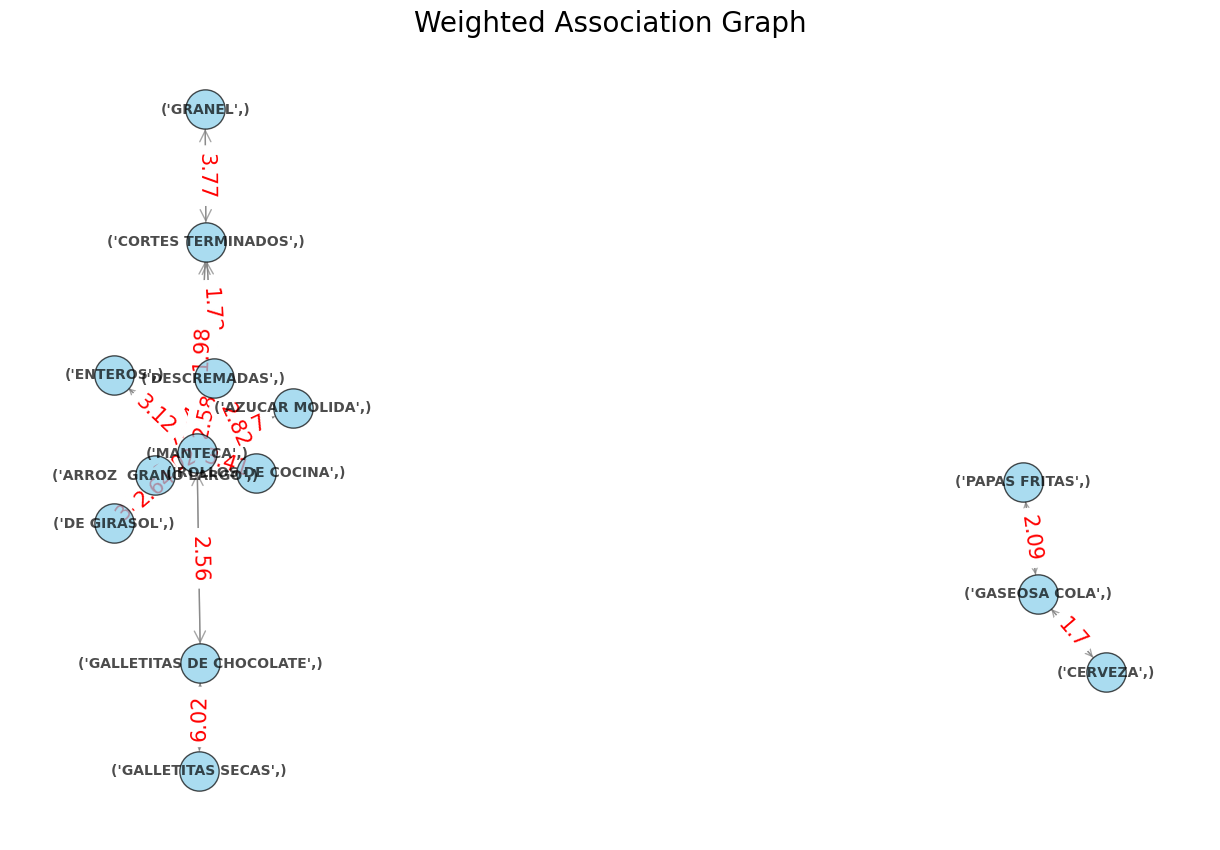

In [2]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Parametrización Reglas de Asociación CM
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #


# Nombre del script input
# -----------------------
script_name = 'in_reglas_de_asociacion_cm.sql'

# Fechas para fijar ventana de análisis
# -------------------------------------
date_start = '2023-11-01'
date_end   = '2023-11-30'

# Umbrales de asociación
#-----------------------
support_threshold = 0.02
confidence_threshold = 0.1
lift_threshold = 1.5
length_threshold = None

# Nivel de árbol
# --------------
tree_level = 'descsubfam'

# Remplazos y eliminaciones de registros
# --------------------------------------
replacements_file = 'reemplazos_asociaciones.csv' # None, 'reemplazos_asociaciones.csv'
avoid_file = 'evitar_asociaciones.csv' # None, 'evitar_asociaciones.csv'

# Credenciales
# ------------
user = 'rjkang'
password = '#Rjkang2023'

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Ejecución Reglas de Asociación CM
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Importar la función desde el script
from main_cm import main_association_rules

# Ejecutar la función y obtener el DataFrame
output = main_association_rules(date_start, date_end, support_threshold,
                                length_threshold, lift_threshold, 
                                confidence_threshold, tree_level,
                                user, password, script_name,
                                replacements_file, avoid_file)

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

In [3]:
output.head()

,antecedents,consequents,support,confidence,lift
0,"(DE GIRASOL,)","(ARROZ GRANO LARGO,)",0.020984,0.263935,3.730024
1,"(ARROZ GRANO LARGO,)","(DE GIRASOL,)",0.020984,0.296547,3.730024
2,"(DESCREMADAS,)","(ARROZ GRANO LARGO,)",0.020073,0.179482,2.536500
3,"(ARROZ GRANO LARGO,)","(DESCREMADAS,)",0.020073,0.283683,2.536500
4,"(MANTECA,)","(ARROZ GRANO LARGO,)",0.025798,0.213945,3.023551


## Upload S3/DataLake

In [2]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Parametrización para subir datos
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Importar la clase Uploader para subir tablas y archivos
from modelos import Uploader

# Argumentos (modificar solo si es necesario)
# ===========================================
# <usuario>
user = 'rjkang'
# <contraseña>
password = '#Rjkang2023'
# <nombre del dataframe>
dataframe = output_marcas
# <nombre del archivo>
file_name = f'rfm_cm_{output_marcas.loc[1, "fecha_analisis"]}_{output.loc[1, "ventana_tiempo"]}dias.csv'
# <nombre del bucket>
bucket_name = 'cencosud.prod.super.ar.raw'
# <ruta del bucket>
s3_path = f'crm/modelos_cencosud/{file_name}'
# <script para verificar si la tabla existe>
verification_script = 'verificacion_tabla_cm.sql'
# ---------------------------------------------
# <script para crear tabla-modificar query si es necesario>
creation_script = 'creacion_tabla_rfm_cm.sql'
# <nombre de la tabla>
table_name = 'out_rfm_cm'

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Creación de instancia para guardar y subir tabla
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Crear instancia del Uploader
uploader = Uploader(bucket_name, s3_path, dataframe, user, password, table_name, 
                    creation_script, verification_script)

In [3]:
# Subir el DataFrame a S3
uploader.upload_dataframe_to_s3()

Archivo rfm_smk_2024-05-01_365dias.csv subido a S3 en la ruta crm/modelos_cencosud/rfm_smk_2024-05-01_365dias.csv


In [5]:
# Verificar y crear la tabla si no existe
uploader.verify_and_create_table()

La tabla se ha creado correctamente.


In [5]:
# Cargar datos desde S3 a Redshift (solo si se quiere subir la tabla al DataLake)
uploader.load_to_redshift()

Carga de datos desde S3 a Redshift completada para la tabla my_table
